In [6]:
import numpy as np
import os, sys, glob
import matplotlib.pyplot as plt
import open3d as o3d
from scipy.stats import chisquare
import pandas as pd

basedir = os.path.dirname(os.getcwd())
_py = os.path.join(basedir, 'py')
_data = os.path.join(basedir, 'data')
_images = os.path.join(basedir, 'images')

sys.path.insert(1, _py)
import lad
import figures

from dotenv import load_dotenv
load_dotenv()

%load_ext autoreload
%autoreload 2

%matplotlib qt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Inputs


In [2]:

mockname = 'single_57_inv'
res = lad.bestfit_pars_la(mockname, norm_avg=False, downsample=False, weigths=True)

voxel_size_w 0.01 DONE...
voxel_size_w 0.05 DONE...
voxel_size_w 0.1 DONE...
voxel_size_w 0.5 DONE...
voxel_size_w 1 DONE...
voxel_size_w BESTFIT:	 0.5
kd3_sr 0.1 DONE...
kd3_sr 0.5 DONE...
kd3_sr 1.0 DONE...
kd3_sr 1.5 DONE...
kd3_sr BESTFIT:	 0.5
max_nn 3 DONE...


/home/omar/myproj/planttech/py/figures.py:32: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(8,5))


max_nn 5 DONE...
max_nn 8 DONE...
max_nn 10 DONE...
max_nn 15 DONE...
max_nn BESTFIT:	 3


In [3]:
lad.best_fit_pars_plot(res, mockname, savefig=None, norm_avg=False, downsample=False, weigths=True)

In [7]:
# load bestfit results
mockname = 'single_57'
resdir_name = '%s_%s' %('results', mockname)
bestfit_file = os.path.join(_data, mockname, resdir_name, 'bestfit.npy')
res = np.load(bestfit_file, allow_pickle=True)
res = res.tolist()

text = 'leaf area=%.2f \n %s=%.4f \n %s=%.4f \n %s=%.4f ' %(res['leafsize'], 'voxel_size_w', res['voxel_size_w_bestfit'],'kd3_sr', res['kd3_sr_bestfit'],'max_nn', res['max_nn_bestfit'])
print(text)

downsample_debug = 1
weigths = True
savefig = '%i_%s' %(downsample_debug, 'weighted' if weigths else 'unweighted')

chis2 = lad.test_leaf_angle(mockname,  0, res['voxel_size_w_bestfit'], 
res['kd3_sr_bestfit'], res['max_nn_bestfit'], debug=True, text=text, 
norm_avg=False, downsample=False, weigths=weigths, savefig=savefig, downsample_debug=downsample_debug)

print(chis2)

leaf area=0.04 
 voxel_size_w=0.1000 
 kd3_sr=1.0000 
 max_nn=5.0000 
['tree_0', 0.005816156033411453, 1.0]


(-10.0, 10.0)

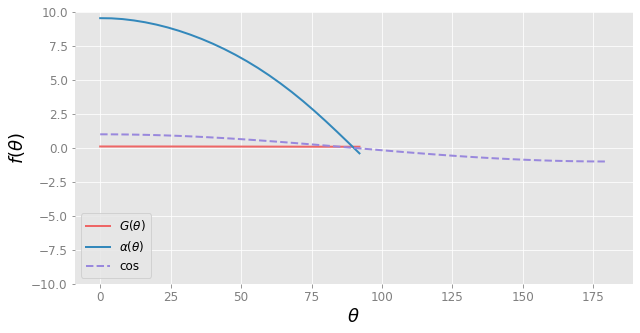

In [21]:

G_alpha_theta = np.load('/home/omar/myproj/planttech/data/single/toy_trees/G_alpha_theta_tree_0_10_weighted.npy')
fig = plt.figure(figsize=(10,5))

plt.plot(G_alpha_theta[0], G_alpha_theta[1], label=r'$G(\theta)$')
plt.plot(G_alpha_theta[0], G_alpha_theta[2], label=r'$\alpha(\theta)$')
x = np.linspace(0,180,90)
plt.plot(x, np.cos(np.radians(x)), ls='--', label='cos')
plt.xlabel(r'$\theta$')
plt.ylabel(r'$f(\theta)$')
plt.legend(loc='lower left')
plt.ylim(-10,10)
# print(np.cos(np.radians(G_alpha_theta[0])), G_alpha_theta[1])